In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')

from src import model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [8]:
processed_data = np.genfromtxt(
    '../data/processed/data_processed.csv',
    delimiter=',',
    dtype=str,
    encoding='utf-8'
)

header = processed_data[0]
processed_data = processed_data[1:].astype(float)

print("Data shape:", processed_data.shape)


Data shape: (10127, 11)


In [9]:
X = processed_data[:, 2:]
y = processed_data[:, 0]

y = 1 - y

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Attrited customer:", np.sum(y == 1))
print("Existing customer", np.sum(y == 0))

Shape of X: (10127, 9)
Shape of y: (10127,)
Attrited customer: 8500
Existing customer 1627


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (8101, 9)
Testing set: (2026, 9)


In [11]:
my_model = model.MyLogisticRegression(learning_rate=0.1, n_iterations=2000)
my_model.fit(X_train, y_train)

y_pred_my_model = my_model.predict(X_test)

Accuracy: 0.8396
Precision: 0.8396
Recall: 1.0000
F1-Score: 0.9128


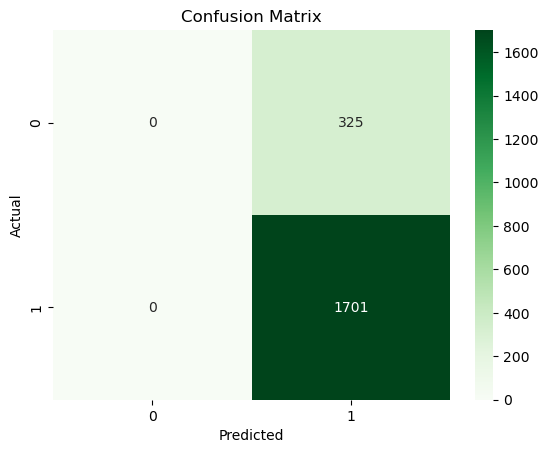

In [12]:
accuracy_my = accuracy_score(y_test, y_pred_my_model)
precision_my = precision_score(y_test, y_pred_my_model)
recall_my = recall_score(y_test, y_pred_my_model)
f1_my = f1_score(y_test, y_pred_my_model)

print(f"Accuracy: {accuracy_my:.4f}")
print(f"Precision: {precision_my:.4f}")
print(f"Recall: {recall_my:.4f}")
print(f"F1-Score: {f1_my:.4f}")

cm_my = confusion_matrix(y_test, y_pred_my_model)
sns.heatmap(cm_my, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()